<a href="https://colab.research.google.com/github/A01793101-GMuniz/ProyectoIntegrador/blob/main/Avance2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Construccion
Se demuestra un profundo conocimiento del dominio, al crear características nuevas y significativas (si aplica). Se codifican las variables categóricas empleando las técnicas adecuadas. Se justifica cada decisión de procesamiento.


In [1]:
import pandas as pd
import numpy as np

# Cargamos la base de datos limpia y filtrada que se generó en el avance anterior del proyecto
db_Bipolar = 'BasededatosBipolaresMTYMapped.csv'


df = pd.read_csv(db_Bipolar)

# Hacemos un head para visualizar los datos
df.head()

,Family_ID,Proband_Relation,Age,Gender,Marital_Status,School_Years,Religion,Employment,Psychiatric_Diagnosis_DIGS,Psychosis_DIGS,D+AH1epression_DIGS,Anxiety_DIGS,Bipolar_DIGS,Eating_Disorders_DIGS,Alcohol_Abuse/Dependence_DIGS,Drugs_Abuse/Dependence_DIGS,Behaviour_Disorders,Personality_Disorders
0,100,Mother,72,Female,Married,Technical_studies,Catholic,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
1,100,Father,77,Male,Married,College,Catholic,Yes,Depresion Mayor,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
2,100,Proband,36,Male,Single,Technical_studies,No Religion,Yes,BPI,No Pathology,No Pathology,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
3,101,Mother,68,Female,Married,High_school,Catholic,No,Depresion Mayor,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
4,101,Father,56,Male,Married,College,Catholic,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology


In [2]:
# Descripcion general de los datos
print("Descripción general de la forma y los tipos de datos:")
print(df.info())
print(f"Shape del conjunto de datos:{df.shape}")

Descripción general de la forma y los tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Family_ID                      425 non-null    int64 
 1   Proband_Relation               425 non-null    object
 2   Age                            425 non-null    int64 
 3   Gender                         425 non-null    object
 4   Marital_Status                 425 non-null    object
 5   School_Years                   425 non-null    object
 6   Religion                       425 non-null    object
 7   Employment                     425 non-null    object
 8   Psychiatric_Diagnosis_DIGS     425 non-null    object
 9   Psychosis_DIGS                 425 non-null    object
 10  D+AH1epression_DIGS            425 non-null    object
 11  Anxiety_DIGS                   425 non-null    object
 12  Bipolar_DI

## CODIFICAR VARIABLES CATEGORICAS

Para trabajar con los metodos mencionados es necesario convertir nuestras variables categoricas en representaciones numericas antes de calcular las correlaciones.

Usaremos 2 tecnicas comunes para analizar nuestros datos y determinar cual es el metodo mas adecuado para nuestro caso de estudio:


1.   One Hot Encoding
2.   Label Encoding


**One Hot Encoding:**

El One-Hot Encoding es utilizado para manejar variables categóricas o de tipo nominal en un formato numérico, convierte variables categóricas en un formato numérico donde cada categoría se representa como una columna binaria (0 o 1), facilitando su uso en algoritmos de aprendizaje automático.


**Label Encoding:**

El Label Encoding es otra técnica para convertir variables categóricas en un formato numérico. Esta técnica es útil cuando existe un orden intrínseco en las categorías, como en el caso de etiquetas ordinales (por ejemplo, "bajo", "medio", "alto"), ya que conserva esta información de orden.

A cada categoría única se asigna a un número entero único. Por ejemplo, si tenemos las categorías "Rojo", "Verde" y "Azul", podríamos asignarles los números 0, 1 y 2 respectivamente.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hacemos una copia de los datos sin valores faltantes o nulos
df_copia = df.copy()
df_copia.head()

,Family_ID,Proband_Relation,Age,Gender,Marital_Status,School_Years,Religion,Employment,Psychiatric_Diagnosis_DIGS,Psychosis_DIGS,D+AH1epression_DIGS,Anxiety_DIGS,Bipolar_DIGS,Eating_Disorders_DIGS,Alcohol_Abuse/Dependence_DIGS,Drugs_Abuse/Dependence_DIGS,Behaviour_Disorders,Personality_Disorders
0,100,Mother,72,Female,Married,Technical_studies,Catholic,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
1,100,Father,77,Male,Married,College,Catholic,Yes,Depresion Mayor,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
2,100,Proband,36,Male,Single,Technical_studies,No Religion,Yes,BPI,No Pathology,No Pathology,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
3,101,Mother,68,Female,Married,High_school,Catholic,No,Depresion Mayor,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
4,101,Father,56,Male,Married,College,Catholic,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology


In [4]:
# Definimos las columnas categoricas
columnas_categoricas = df_copia.select_dtypes(exclude=np.number).columns.tolist()
columnas_categoricas

['Proband_Relation',
 'Gender',
 'Marital_Status',
 'School_Years',
 'Religion',
 'Employment',
 'Psychiatric_Diagnosis_DIGS',
 'Psychosis_DIGS',
 'D+AH1epression_DIGS',
 'Anxiety_DIGS',
 'Bipolar_DIGS',
 'Eating_Disorders_DIGS',
 'Alcohol_Abuse/Dependence_DIGS',
 'Drugs_Abuse/Dependence_DIGS',
 'Behaviour_Disorders',
 'Personality_Disorders']

In [5]:
# Definimos las columnas ordinales
columnas_ordinales = ['School_Years']
print("Columnas Ordinales")
print(columnas_ordinales)
print("\n")

# Creamos una lista de columnas nominales
columnas_nominales = [columna for columna in columnas_categoricas if columna not in columnas_ordinales]
columnas_nominales.remove("Psychiatric_Diagnosis_DIGS")
print("Columnas Nominales")
columnas_nominales

Columnas Ordinales
['School_Years']


Columnas Nominales


['Proband_Relation',
 'Gender',
 'Marital_Status',
 'Religion',
 'Employment',
 'Psychosis_DIGS',
 'D+AH1epression_DIGS',
 'Anxiety_DIGS',
 'Bipolar_DIGS',
 'Eating_Disorders_DIGS',
 'Alcohol_Abuse/Dependence_DIGS',
 'Drugs_Abuse/Dependence_DIGS',
 'Behaviour_Disorders',
 'Personality_Disorders']

Existen tipos de variables categoricas, para llevar a cabo nuestro analisis es necesario definir cuales son estos.

**Variables categóricas ordinales**

Las variables categóricas pueden ser de naturaleza ordinal, lo que significa que tienen un orden inherente. Por ejemplo, considera una columna llamada "Grado de Estudios", donde los niveles educativos están ordenados de menor a mayor.

**Variables categóricas nominales**

Asimismo, también encontramos variables categóricas de naturaleza nominal, las cuales carecen de un orden inherente. Por ejemplo, considera una columna llamada "Empleo", donde no hay un orden específico entre los diferentes tipos de empleos registrados en el conjunto de datos.


Ahora que hemos aclarado esto, es más evidente cuándo utilizar One Hot Encoding y Label Encoding. En consecuencia, One Hot Encoding se empleará para nuestras variables categóricas nominales, mientras que Label Encoding se utilizará en las variables categóricas ordinales.

### Varriables Categoricas Nominales (One Hot Encoding)

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Creamos one-hot encoding para las variables categóricas
one_hot_df = df_copia.copy()
# Quitamos Psychiatric_Diagnosis_DIGS
one_hot_df.drop(columns=['Psychiatric_Diagnosis_DIGS'], inplace=True)
# Quitamos las columnas nominales de one_hot_df
one_hot_df.drop(columns=columnas_nominales, inplace=True)

# Iniciamos el codificador OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
# Ajustamos y transformarmos las columnas nominales usando multi_df
nominales_encoded = one_hot_encoder.fit_transform(df_copia[columnas_nominales])
# Obtenemos los nombres de las nuevas columnas generadas por el codificador
nuevas_columnas = one_hot_encoder.get_feature_names_out(columnas_nominales)

# Convertimos los valores codificados a enteros
nominales_encoded_int = nominales_encoded.astype(int)

# Creamos un nuevo DataFrame con las columnas codificadas
one_hot_encoded_df = pd.DataFrame(nominales_encoded_int, columns=nuevas_columnas)
one_hot_encoded_df = one_hot_encoded_df.astype(int)

# Reseteamos los índices para asegurar una alineación adecuada antes de hacer merge
one_hot_df.reset_index(drop=True, inplace=True)
one_hot_encoded_df.reset_index(drop=True, inplace=True)

# Concatenamos el DataFrame codificado con las columnas del DataFrame original que no son nominales
one_hot_df = pd.merge(one_hot_df, one_hot_encoded_df, left_index=True, right_index=True, how='inner')
one_hot_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Family_ID,Age,School_Years,Proband_Relation_Brother,Proband_Relation_Cousin_Female,Proband_Relation_Cousin_Male,Proband_Relation_Daughter,Proband_Relation_Father,Proband_Relation_Mother,Proband_Relation_Nephew,...,Employment_Yes,Psychosis_DIGS_Yes,D+AH1epression_DIGS_Yes,Anxiety_DIGS_Yes,Bipolar_DIGS_Yes,Eating_Disorders_DIGS_Yes,Alcohol_Abuse/Dependence_DIGS_Yes,Drugs_Abuse/Dependence_DIGS_Yes,Behaviour_Disorders_Yes,Personality_Disorders_Yes
0,100,72,Technical_studies,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,100,77,College,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
2,100,36,Technical_studies,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,101,68,High_school,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,101,56,College,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
# Imprimimos la forma resultante y validamos que no existe algun valor nulo
print(one_hot_df.shape)
one_hot_df[one_hot_df.isnull().any(axis=1)]

(425, 32)


,Family_ID,Age,School_Years,Proband_Relation_Brother,Proband_Relation_Cousin_Female,Proband_Relation_Cousin_Male,Proband_Relation_Daughter,Proband_Relation_Father,Proband_Relation_Mother,Proband_Relation_Nephew,...,Employment_Yes,Psychosis_DIGS_Yes,D+AH1epression_DIGS_Yes,Anxiety_DIGS_Yes,Bipolar_DIGS_Yes,Eating_Disorders_DIGS_Yes,Alcohol_Abuse/Dependence_DIGS_Yes,Drugs_Abuse/Dependence_DIGS_Yes,Behaviour_Disorders_Yes,Personality_Disorders_Yes


### Variables Categoricas Ordinales (Label Encoder)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Creamos un DataFrame encoded_df para almacenar las transformaciones, este sera nuestro dataframe final
encoded_df = one_hot_df.copy()
# Quitamos las columnas ordinales del df que ya se aplico transformacion one hot
one_hot_df.drop(columns=columnas_ordinales, inplace=True)

# Inicializamos el LabelEncoder
label_encoder = LabelEncoder()

# Aplicamos la transformacion a las columnas ordinales usando LabelEncoder
for col in columnas_ordinales:
  encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

# Tenemos que hacer un reset a los índices para asegurar una alineación adecuada antes de hacer merge
encoded_df.reset_index(drop=True, inplace=True)

# Unimos el DataFrame codificado con las columnas del DataFrame original que no son ordinales
encoded_df = pd.concat([one_hot_df, encoded_df[columnas_ordinales]], axis=1)

encoded_df.head()


,Family_ID,Age,Proband_Relation_Brother,Proband_Relation_Cousin_Female,Proband_Relation_Cousin_Male,Proband_Relation_Daughter,Proband_Relation_Father,Proband_Relation_Mother,Proband_Relation_Nephew,Proband_Relation_Niece,...,Psychosis_DIGS_Yes,D+AH1epression_DIGS_Yes,Anxiety_DIGS_Yes,Bipolar_DIGS_Yes,Eating_Disorders_DIGS_Yes,Alcohol_Abuse/Dependence_DIGS_Yes,Drugs_Abuse/Dependence_DIGS_Yes,Behaviour_Disorders_Yes,Personality_Disorders_Yes,School_Years
0,100,72,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5
1,100,77,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,100,36,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5
3,101,68,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,2
4,101,56,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Imprimimos la forma resultante y validamos que no existe algun valor nulo
print(encoded_df.shape)
encoded_df[encoded_df.isnull().any(axis=1)]

(425, 32)


,Family_ID,Age,Proband_Relation_Brother,Proband_Relation_Cousin_Female,Proband_Relation_Cousin_Male,Proband_Relation_Daughter,Proband_Relation_Father,Proband_Relation_Mother,Proband_Relation_Nephew,Proband_Relation_Niece,...,Psychosis_DIGS_Yes,D+AH1epression_DIGS_Yes,Anxiety_DIGS_Yes,Bipolar_DIGS_Yes,Eating_Disorders_DIGS_Yes,Alcohol_Abuse/Dependence_DIGS_Yes,Drugs_Abuse/Dependence_DIGS_Yes,Behaviour_Disorders_Yes,Personality_Disorders_Yes,School_Years


In [10]:
# Realizamos un info al conjunto final de datos ya con las transformaciones realizadas
print(encoded_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Family_ID                          425 non-null    int64
 1   Age                                425 non-null    int64
 2   Proband_Relation_Brother           425 non-null    int64
 3   Proband_Relation_Cousin_Female     425 non-null    int64
 4   Proband_Relation_Cousin_Male       425 non-null    int64
 5   Proband_Relation_Daughter          425 non-null    int64
 6   Proband_Relation_Father            425 non-null    int64
 7   Proband_Relation_Mother            425 non-null    int64
 8   Proband_Relation_Nephew            425 non-null    int64
 9   Proband_Relation_Niece             425 non-null    int64
 10  Proband_Relation_Proband           425 non-null    int64
 11  Proband_Relation_Sister            425 non-null    int64
 12  Proband_Relation_Son  

### Matriz de Correlacion





In [11]:
import pandas as pd
from scipy.stats import spearmanr

# Creamos una funcion para graficar mapas de calor
def plot_heatmap(corr_matrix, method):
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
  plt.title(f'Heatmap de la Matriz de Correlación usando metodo {method}')
  plt.show()

# Creamos una función para generar matrices de correlación
def get_correlation_matrix(df_encoded, method):
  # Calculamos el coeficiente de correlación para cada par de columnas usando el metodo seleccionado
  spearman_corr_matrix = df_encoded.corr(method=method)

  # Visualizamos la matriz de correlación
  plot_heatmap(spearman_corr_matrix, method=method)

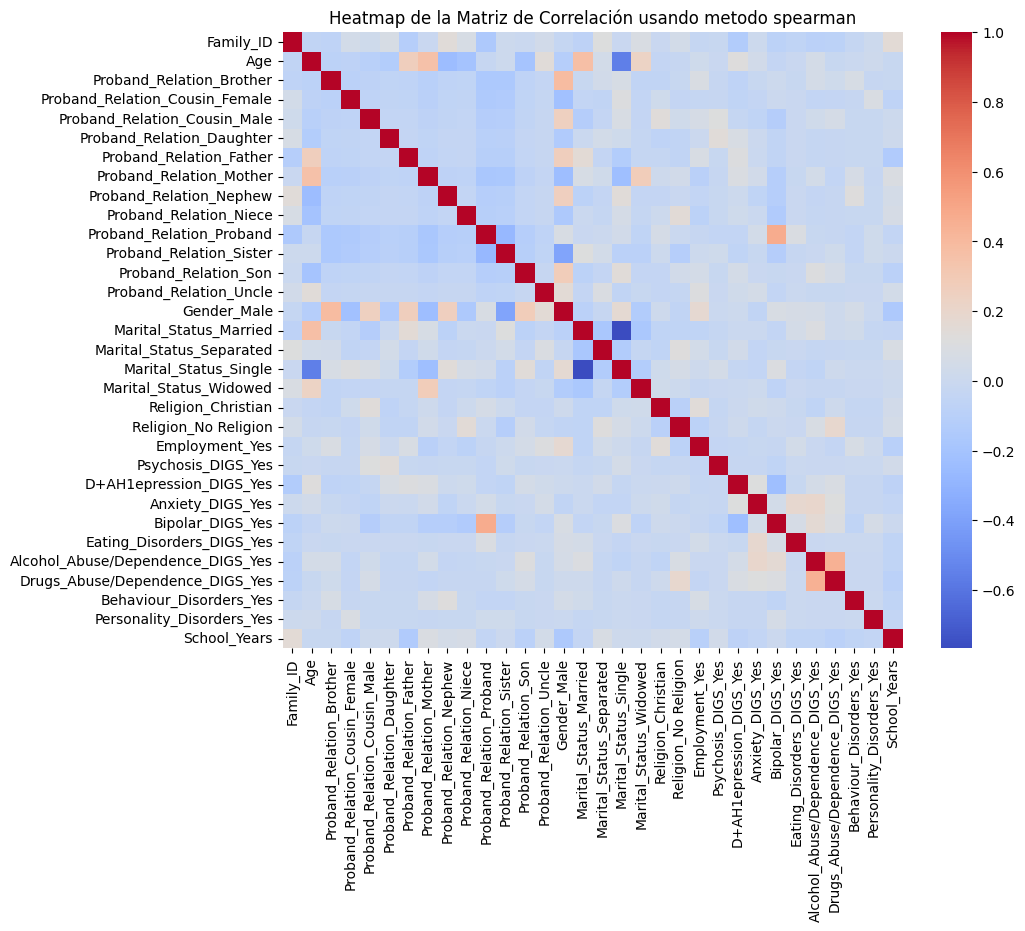

In [13]:
# Obtenemos la matriz de correlacion usando el metodo de spearman
get_correlation_matrix(encoded_df, "spearman")

La realización de la matriz de correlación en nuestro conjunto de datos nos ha permitido identificar las relaciones lineales entre nuestras variables.Nos ayudo a comprender la interdependencia entre las características, lo que nos proporciona información valiosa sobre la estructura y las asociaciones dentro de nuestros datos.

Al examinar los coeficientes de correlación entre las variables, pudimos determinar la fuerza y la dirección de las relaciones lineales.
Por ejemplo, una correlación positiva cercana a 1 indica una asociación positiva fuerte entre dos variables, mientras que una correlación negativa cercana a -1 indica una asociación negativa fuerte.

Además, al  identificar las características que tienen correlaciones altas entre sí puede ser útil para reducir la redundancia y seleccionar las variables más relevantes para análisis posteriores.

En nuestro conjunto de datos no existen muchas correlaciones cercanas a valores 1 o -1 por lo que consideramos que en este punto de nuestro analisis tenemos un conjunto de datos balanceado correctamente.

### ANALSIS PCA

In [12]:
from sklearn.decomposition import PCA

def get_PCA(df_encoded):
    # Creamos la instancia de PCA
    pca = PCA()

    # Ajustamos el modelo PCA a los datos
    pca.fit(df_encoded)

    # Calculamos la suma acumulativa de la proporción de varianza explicada por cada componente principal
    total_varianza_explicada = pca.explained_variance_ratio_.cumsum()

    # Determinamos el número de componentes principales necesarios para explicar el 90% de la varianza acumulada
    varianza_noventa = sum(total_varianza_explicada < 0.90) + 1

    # Imprimimos el número de componentes necesarios para explicar el 90% de la varianza acumulada
    print("Número de componentes para explicar el 90% de la varianza:", varianza_noventa)

    # Creamos un DataFrame que resuma las características de los componentes principales
    pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                               'Proportion of variance': pca.explained_variance_ratio_,
                               'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)
                               })
    pcsSummary = pcsSummary.transpose()
    pcsSummary = pcsSummary.round(4)

    # Creamos una lista de números enteros que representan los componentes principales
    PC_components = np.arange(varianza_noventa) + 1

    fig, ax = plt.subplots(figsize=(10, 7))

    # Creamos un gráfico de barras que muestra la proporción de varianza explicada por cada componente principal
    _ = sns.barplot(x=PC_components,
                    y=pca.explained_variance_ratio_[:varianza_noventa],
                    color='b')

    # Agregamos una línea(scree) que muestra la proporción acumulativa de varianza explicada por los componentes principales
    _ = sns.lineplot(x=PC_components - 1,
                     y=np.cumsum(pca.explained_variance_ratio_[:varianza_noventa]),
                     color='black',
                     linestyle='-',
                     linewidth=2,
                     marker='o',
                     markersize=8)

    plt.title('Scree Plot > 90% Varianza')
    plt.xlabel('N-th Componente Principal')
    plt.ylabel('Varianza Explicada')
    plt.ylim(0, 1)
    plt.show()

    # Creamos un DataFrame que contiene los vectores de componentes principales
    pca_Components_df = pd.DataFrame(pca.components_.transpose(),
                                     columns=pcsSummary.columns,
                                     index=df_encoded.columns
                                     )

    # Renombramos las columnas del DataFrame `pca_Components_df` con el prefijo 'PC'
    pca_Components_df.columns = ['PC' + str(i) for i in range(1, pca_Components_df.shape[1] + 1)]
    pca_Components_df = pca_Components_df.sort_values(by='PC1', ascending=False)
    return pca_Components_df.iloc[:, :varianza_noventa]


Número de componentes para explicar el 90% de la varianza: 2


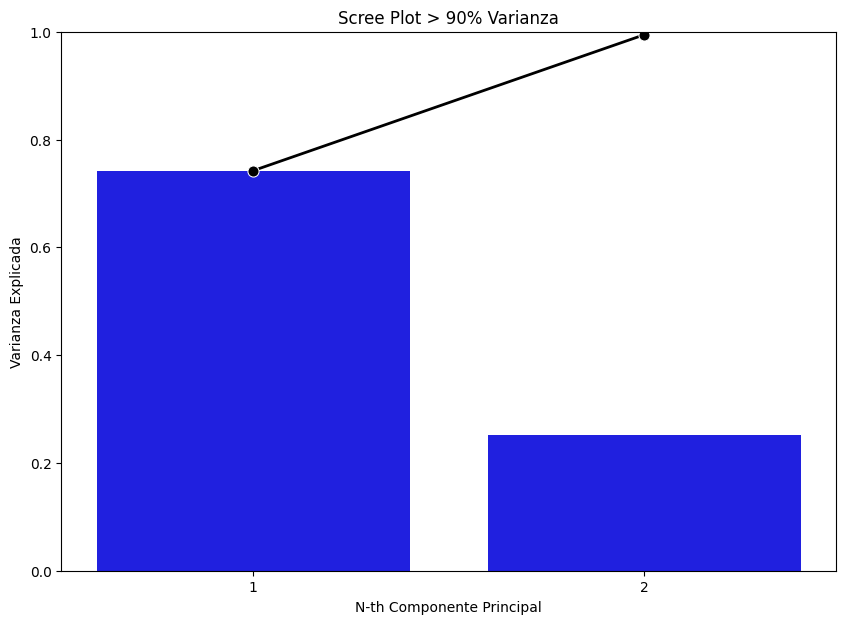

,PC1,PC2
Age,0.047463,0.998617
Proband_Relation_Proband,0.002494,-0.001429
Marital_Status_Married,0.001643,0.010715
Bipolar_DIGS_Yes,0.001426,-0.001794
D+AH1epression_DIGS_Yes,0.001393,0.002088
Proband_Relation_Father,0.000861,0.003765
Proband_Relation_Brother,0.000711,-0.001694
Employment_Yes,0.000569,-0.000325
Alcohol_Abuse/Dependence_DIGS_Yes,0.000501,0.000469
Gender_Male,0.000454,-0.003322


In [14]:
# Realizamos el analisis PCA e imprimimos la importancia de cada feature en cada
# componente
components = get_PCA(encoded_df)
components.head(29)

La aplicación del análisis de componentes principales (PCA) en nuestro conjunto de datos revela que existen dos componentes principales los cuales explican  el 90% de la variabilidad en nuestras características.

Este resultado consideramos es significativo ya que nos proporciona una reducción efectiva de la dimensionalidad, permitiéndonos resumir la información contenida en múltiples variables originales en solo dos componentes.

Al examinar los elementos principales de estos componentes, podemos observar las contribuciones relativas de cada característica a la variabilidad total.

Por ejemplo, el primer componente principal (PC1) muestra una alta carga positiva en la variable 'Age', lo que indica que la edad tiene una influencia significativa en la dirección de este componente.

Por otro lado, el segundo componente principal (PC2) muestra una alta carga positiva en la variable 'Proband_Relation_Proband', lo que sugiere que las relaciones con el probando tienen un impacto más destacado en este componente. Esta reducción de dimensionalidad nos permite visualizar y comprender mejor la estructura de nuestros datos, lo que puede ser útil para la interpretación y la toma de decisiones en análisis posteriores.

# Normalización
Se escalan las variables para garantizar que todas tengan un impacto equitativo en el modelo y mejorar la convergencia de algunos algoritmos. Se aplican transformaciones comunes para lograr una distribución normal en algunas variables, si es necesario en el contexto y los objetivos de análisis. Se justifica cada técnica empleada.


En nuestro análisis del conjunto de datos, creemos que no es necesario aplicar técnicas de normalización a las variables.

Esto se debe a que la mayoría de nuestras características son de naturaleza categórica, lo que significa que representan categorías discretas en lugar de valores numéricos continuos. Las variables categóricas, como el género, la religión, el estado civil y otras, no requieren normalización, ya que la comparación de sus valores se basa en la igualdad o diferencia entre categorías, en lugar de en la magnitud de los valores numéricos.

La única excepción es la variable de edad, que es numérica y podría necesitar ser escalada o normalizada si fuera relevante para nuestro análisis. Sin embargo en esta ocacion, no lo creemos necesario.

# Selección / extracción
Se aplican métodos de filtrado y extracción, alineados a los resultados obtenidos de las pruebas efectuadas, para reducir la complejidad, acelerar el proceso de entrenamiento y facilitar la interpretación de los resultados.


### Creacion de conjunto de caracteristicas

Creemos que para contar con un modelo mas eficiente y de mayor complejidad y fiabilidad es necesario agrupar los datos actuales de acuerdo a grupos familiares.

Es por eso que se agruparan las familias en un data frame utilizando el Family_ID y las relaciones familiares como metodos de agrupacion.

In [15]:
# Encontramos el numero de Familias en nuestro Data set
print("Total de familias")
encoded_df['Family_ID'].nunique()

Total de familias


85

In [16]:
# Eliminamos al probando/paciente del conjunto de datos.
df_sinproband = encoded_df[encoded_df['Proband_Relation_Proband'] != 1]
df_sinproband.reset_index()

,index,Family_ID,Age,Proband_Relation_Brother,Proband_Relation_Cousin_Female,Proband_Relation_Cousin_Male,Proband_Relation_Daughter,Proband_Relation_Father,Proband_Relation_Mother,Proband_Relation_Nephew,...,Psychosis_DIGS_Yes,D+AH1epression_DIGS_Yes,Anxiety_DIGS_Yes,Bipolar_DIGS_Yes,Eating_Disorders_DIGS_Yes,Alcohol_Abuse/Dependence_DIGS_Yes,Drugs_Abuse/Dependence_DIGS_Yes,Behaviour_Disorders_Yes,Personality_Disorders_Yes,School_Years
0,0,100,72,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5
1,1,100,77,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,101,68,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,4,101,56,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,101,25,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,420,184,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328,421,183,65,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
329,422,184,47,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330,423,184,19,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2


In [17]:
# Encontramos el numero de Familias en el Data set sin probandos
print("Numero de familias sin el paciente diagnosticado")
df_sinproband['Family_ID'].nunique()

Numero de familias sin el paciente diagnosticado


76

In [18]:
# Obtener los conjuntos de valores únicos de Family_ID en cada DataFrame
family_id_grouped = set(encoded_df['Family_ID'])
family_id_sin_probandos = set(df_sinproband['Family_ID'])

# Encontrar los valores que están en uno de los conjuntos pero no en el otro
valores_no_comunes = family_id_grouped.symmetric_difference(family_id_sin_probandos)

print("Valores que no se encuentran en ambos DataFrames:")
print(valores_no_comunes)

Valores que no se encuentran en ambos DataFrames:
{108, 111, 125, 127, 149, 150, 157, 176, 181}


In [19]:
# Creamos otro conjunto adicional donde tendremos los datos del probando
# Exceptuando la informacion de los padecimientos psiquiatricos
df_proband = encoded_df[encoded_df['Proband_Relation_Proband'] == 1]
columnas_a_eliminar = [columna for columna in encoded_df.columns if '_Yes' in columna]
columnas_a_eliminar.extend([columna for columna in encoded_df if columna.startswith('Proband_Relation_') and not columna.endswith('Proband')])
df_proband.drop(columnas_a_eliminar, axis=1, inplace=True)
df_proband=df_proband.reset_index()
df_proband.head()

<ipython-input-19-3627c42af929>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proband.drop(columnas_a_eliminar, axis=1, inplace=True)


,index,Family_ID,Age,Proband_Relation_Proband,Gender_Male,Marital_Status_Married,Marital_Status_Separated,Marital_Status_Single,Marital_Status_Widowed,Religion_Christian,Religion_No Religion,School_Years
0,2,100,36,1,1,0,0,1,0,0,1,5
1,5,101,28,1,0,0,0,1,0,0,0,0
2,8,102,41,1,0,1,0,0,0,0,0,5
3,10,103,29,1,1,0,0,1,0,0,0,0
4,13,104,36,1,0,1,0,0,0,0,0,2


In [20]:
# Hacemos un info para ver los datos finales
df_proband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   index                     93 non-null     int64
 1   Family_ID                 93 non-null     int64
 2   Age                       93 non-null     int64
 3   Proband_Relation_Proband  93 non-null     int64
 4   Gender_Male               93 non-null     int64
 5   Marital_Status_Married    93 non-null     int64
 6   Marital_Status_Separated  93 non-null     int64
 7   Marital_Status_Single     93 non-null     int64
 8   Marital_Status_Widowed    93 non-null     int64
 9   Religion_Christian        93 non-null     int64
 10  Religion_No Religion      93 non-null     int64
 11  School_Years              93 non-null     int64
dtypes: int64(12)
memory usage: 8.8 KB


In [21]:
# Encontramos el numero de Familias en nuestro Data set de probandos
print("Número total de familias")
df_proband['Family_ID'].nunique()

Número total de familias


67

In [22]:
# Obtener los conjuntos de valores únicos de Family_ID en cada DataFrame
family_id_grouped = set(encoded_df['Family_ID'])
family_id_sin_probandos = set(df_proband['Family_ID'])

# Encontrar los valores que están en uno de los conjuntos pero no en el otro
valores_no_comunes = family_id_grouped.symmetric_difference(family_id_sin_probandos)

print("Valores que no se encuentran en ambos DataFrames:")
print(valores_no_comunes)

Valores que no se encuentran en ambos DataFrames:
{114, 130, 131, 142, 160, 161, 162, 163, 165, 166, 168, 170, 171, 172, 174, 175, 183, 186}


In [23]:
encoded_df.loc[encoded_df['Family_ID'] == 123]

,Family_ID,Age,Proband_Relation_Brother,Proband_Relation_Cousin_Female,Proband_Relation_Cousin_Male,Proband_Relation_Daughter,Proband_Relation_Father,Proband_Relation_Mother,Proband_Relation_Nephew,Proband_Relation_Niece,...,Psychosis_DIGS_Yes,D+AH1epression_DIGS_Yes,Anxiety_DIGS_Yes,Bipolar_DIGS_Yes,Eating_Disorders_DIGS_Yes,Alcohol_Abuse/Dependence_DIGS_Yes,Drugs_Abuse/Dependence_DIGS_Yes,Behaviour_Disorders_Yes,Personality_Disorders_Yes,School_Years
74,123,46,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
75,123,33,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
76,123,51,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
77,123,34,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
78,123,64,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
79,123,60,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
80,123,50,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [24]:
# Agrupamos por Family_ID y Proband_Relation combinando los valores de cada columna
grouped_df = df_sinproband.groupby(['Family_ID', 'Proband_Relation_Proband']).agg(lambda x: x.tolist()).unstack()

# Reindexamos el DataFrame
grouped_df = grouped_df.reset_index()
grouped_df.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in grouped_df.columns]

grouped_df.head(20)

,Family_ID,Age,Proband_Relation_Brother,Proband_Relation_Cousin_Female,Proband_Relation_Cousin_Male,Proband_Relation_Daughter,Proband_Relation_Father,Proband_Relation_Mother,Proband_Relation_Nephew,Proband_Relation_Niece,...,Psychosis_DIGS_Yes,D+AH1epression_DIGS_Yes,Anxiety_DIGS_Yes,Bipolar_DIGS_Yes,Eating_Disorders_DIGS_Yes,Alcohol_Abuse/Dependence_DIGS_Yes,Drugs_Abuse/Dependence_DIGS_Yes,Behaviour_Disorders_Yes,Personality_Disorders_Yes,School_Years
0,100,"[72, 77]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 1]","[1, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[5, 0]"
1,101,"[68, 56, 25, 21]","[0, 0, 1, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 1, 0, 0]","[1, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]",...,"[0, 0, 0, 0]","[1, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 1, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[2, 0, 2, 2]"
2,102,"[47, 66]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 1]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 1]","[0, 0]","[1, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[2, 5]"
3,103,[46],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[3]
4,104,"[66, 69, 39, 41, 43, 33]","[0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[5, 0, 2, 0, 0, 0]"
5,105,"[61, 69, 33, 23]","[0, 0, 0, 1]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 1, 0, 0]","[1, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]",...,"[0, 0, 0, 0]","[0, 1, 0, 0]","[0, 0, 0, 0]","[0, 0, 1, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]"
6,106,"[50, 59, 24, 28, 26]","[0, 0, 0, 1, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 1, 0, 0, 0]","[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 1, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 1, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 1]","[2, 0, 0, 5, 0]"
7,107,"[65, 47, 46, 19, 36]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[1, 0, 0, 0, 0]","[0, 0, 0, 1, 0]","[0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[1, 0, 3, 2, 0]"
8,109,"[62, 41]","[0, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[1, 0]"
9,110,[60],[0],[0],[0],[0],[0],[1],[0],[0],...,[0],[1],[0],[0],[0],[0],[0],[0],[0],[1]


In [25]:
grouped_df.shape

(76, 31)

In [26]:
# Lista de columnas de cada familiar
familiar_columns = list(grouped_df.columns)
familiar_columns.remove("Family_ID")
# Creamos una lista para almacenar los valores de cada familia
data_rows = []

# Iteramos sobre cada fila del DataFrame
for index, row in grouped_df.iterrows():
    family_id = row['Family_ID']
    num_families = min(2, len(row['Age']))  # Tomamos solo los datos de los primeros 2 familiares
    if num_families >= 2:
      new_row = {'Family_ID': family_id}
      for i in range(num_families):
        for col in familiar_columns:
          new_row[f"{col}_Familiar{i+1}"] = row[col][i]
      data_rows.append(new_row)

# Creamos un nuevo DataFrame con los datos reorganizados
new_df = pd.DataFrame(data_rows)

# Mostramos el nuevo DataFrame
new_df.head()

,Family_ID,Age_Familiar1,Proband_Relation_Brother_Familiar1,Proband_Relation_Cousin_Female_Familiar1,Proband_Relation_Cousin_Male_Familiar1,Proband_Relation_Daughter_Familiar1,Proband_Relation_Father_Familiar1,Proband_Relation_Mother_Familiar1,Proband_Relation_Nephew_Familiar1,Proband_Relation_Niece_Familiar1,...,Psychosis_DIGS_Yes_Familiar2,D+AH1epression_DIGS_Yes_Familiar2,Anxiety_DIGS_Yes_Familiar2,Bipolar_DIGS_Yes_Familiar2,Eating_Disorders_DIGS_Yes_Familiar2,Alcohol_Abuse/Dependence_DIGS_Yes_Familiar2,Drugs_Abuse/Dependence_DIGS_Yes_Familiar2,Behaviour_Disorders_Yes_Familiar2,Personality_Disorders_Yes_Familiar2,School_Years_Familiar2
0,100,72,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,101,68,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102,47,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5
3,104,66,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,105,61,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [27]:
new_df.shape

(56, 61)

In [28]:
# Numero de Pacientes con 2 o mas Familiares encuestados
new_df['Family_ID'].nunique()

56

# Conclusiones
Se incluye una conclusión general de la fase de Preparación de los datos en el contexto de la metodología CRISP-ML.


En las últimas semanas, hemos avanzado significativamente en la preparación de los datos y la creación de un marco sólido para nuestro modelo de inteligencia artificial destinado a predecir el padecimiento psiquiátrico de bipolaridad. Nuestro enfoque se ha basado en la metodología CRISP-ML, lo que nos ha permitido seguir un proceso estructurado y sistemático desde la comprensión del negocio hasta la preparación de los datos para el modelado.

Comenzamos nuestro viaje comprendiendo las necesidades de nuestro cliente y definiendo claramente los objetivos del proyecto. La propuesta de predecir la bipolaridad mediante la comprensión de las relaciones familiares demostró ser un enfoque prometedor y relevante, lo que nos llevó a centrar nuestros esfuerzos en la exploración y preparación de los datos.

En la fase de comprensión de los datos, nos sumergimos en una exploración detallada, identificando las características más relevantes y eliminando los datos nulos. Para abordar los valores faltantes en variables categóricas, optamos por la imputación de la moda, mientras que para las numéricas, utilizamos la media. Esta decisión nos permitió conservar una cantidad significativa de datos, enriqueciendo así nuestra muestra.

Luego, procedimos con la preparación de los datos, aplicando técnicas de codificación como One Hot Encoding para variables nominales y Label Encoding para ordinales. Además, exploramos la reducción de dimensionalidad utilizando PCA y evaluamos las correlaciones entre las características con la matriz de correlación de Spearman.

La fase de agrupación de datos reveló valiosos insights al identificar y separar a las familias del conjunto de probandos. Eliminamos al paciente diagnosticado para concentrarnos en los patrones familiares, lo que resultó en un total de 76 familias disponibles para el modelado. Este enfoque nos permitió obtener una muestra diversa y representativa para nuestro análisis.

En resumen, hemos sentado las bases sólidas para nuestro modelo de predicción de bipolaridad, demostrando un compromiso con la calidad de los datos y la rigurosidad metodológica en cada etapa del proceso. Mirando hacia el futuro, nos dirigimos hacia la implementación y evaluación de modelos de aprendizaje automático, con el objetivo de ofrecer predicciones precisas y útiles para mejorar la atención médica y el bienestar de los pacientes.